<a href="https://colab.research.google.com/github/phule1812/iurc2/blob/master/second_step_velocity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
# drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')

In [2]:
import requests
import zipfile
from pathlib import Path

# Setup path to a data folder
data_path = Path("data/")
image_path = data_path/ 'dataset'

if image_path.is_dir():
  print(f'{image_path} directory already exists ... ')
else:
  print(f'{image_path} does not exist, creatin one ...')
  image_path.mkdir(parents = True, exist_ok = True)

# Download dataset
with open(data_path / 'dataset.zip', 'wb') as f:
  request = requests.get('https://github.com/phule1812/iurc2/raw/master/dataset.zip')
  print('Downloading dataset ...')
  f.write(request.content)

# Unzip dataset
with zipfile.ZipFile(data_path / "dataset.zip", 'r') as zip_ref:
  print('Unzipping dataset ...')
  zip_ref.extractall(image_path)

data/dataset does not exist, creatin one ...
Unzipping dataset ...


In [3]:
df = pd.read_csv('data/dataset/dataset/velocity.csv')
df_red = pd.read_csv('data/dataset/dataset/velocity_red.csv')
df_green = pd.read_csv('data/dataset/dataset/velocity_green.csv')
df_blue = pd.read_csv('data/dataset/dataset/velocity_blue.csv')

In [4]:
df = df.drop(columns = 'Unnamed: 0')
df_red = df_red.drop(columns = 'Unnamed: 0')
df_green = df_green.drop(columns = 'Unnamed: 0')
df_blue = df_blue.drop(columns = 'Unnamed: 0')

In [5]:
df = df[['w1', 'w2', 'w3']]
df_red = df_red[['w1', 'w2', 'w3']]
df_green = df_green[['w1', 'w2', 'w3']]
df_blue = df_blue[['w1', 'w2', 'w3']]

In [6]:
df.head()

,w1,w2,w3
0,158.000000,141.967742,144.692308
1,157.950000,157.680000,147.673469
2,162.000000,181.465116,143.500000
3,168.000000,205.434783,145.800000
4,164.213115,221.282609,150.362069


In [7]:
df_red.head()

,w1,w2,w3
0,136.285714,126.957447,128.106383
1,135.675000,147.122449,132.923077
2,136.723404,165.780000,143.027027
3,138.240000,193.609756,139.108696
4,141.882353,214.897959,143.307692


In [8]:
df_green.head()

,w1,w2,w3
0,163.800000,169.105263,165.705882
1,170.470588,194.400000,171.529412
2,172.340426,207.173077,171.000000
3,177.428571,236.520000,172.698113
4,173.700000,257.538462,177.882353


In [9]:
df_blue.head()

,w1,w2,w3
0,163.928571,153.225000,156.315789
1,162.000000,176.294118,159.810811
2,163.542857,203.400000,164.634146
3,171.562500,223.714286,169.043478
4,170.409836,250.714286,172.928571


In [10]:
df_red = df_red.rename(columns = {'w3' : 'w3_red', 'w1' : 'w1_red', 'w2' : 'w2_red'})

In [11]:
df_green = df_green.rename(columns = {'w3' : 'w3_green', 'w1' : 'w1_green', 'w2' : 'w2_green'})

In [12]:
df_blue = df_blue.rename(columns = {'w3' : 'w3_blue', 'w1' : 'w1_blue', 'w2' : 'w2_blue'})

In [13]:
df_red.head()

,w1_red,w2_red,w3_red
0,136.285714,126.957447,128.106383
1,135.675000,147.122449,132.923077
2,136.723404,165.780000,143.027027
3,138.240000,193.609756,139.108696
4,141.882353,214.897959,143.307692


In [14]:
df_green.head()

,w1_green,w2_green,w3_green
0,163.800000,169.105263,165.705882
1,170.470588,194.400000,171.529412
2,172.340426,207.173077,171.000000
3,177.428571,236.520000,172.698113
4,173.700000,257.538462,177.882353


In [15]:
df_blue.head()

,w1_blue,w2_blue,w3_blue
0,163.928571,153.225000,156.315789
1,162.000000,176.294118,159.810811
2,163.542857,203.400000,164.634146
3,171.562500,223.714286,169.043478
4,170.409836,250.714286,172.928571


##Calculate Ix, Iy and If with this formula

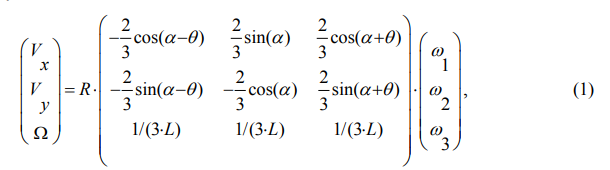

In this formula:
* L = 125
* R = 40
* theta = 30 deg
* alpha = 0

In [16]:
L = 125
R = 40
theta = 2*np.pi*30/360
alpha = 0

In [17]:
convert_matrix = [[-2/3 * np.cos(alpha - theta), 2/3 * np.sin(alpha), 2/3 *np.cos(alpha + theta)],
                  [-2/3 * np.sin(alpha - theta), -2/3 * np.cos(alpha), 2/3 * np.sin(alpha + theta)],
                  [1/3, 1/3, 1/3]]

In [18]:
df_green.iloc[0].to_numpy()

array([163.8       , 169.10526316, 165.70588235])

In [19]:
np.dot(convert_matrix, df_green.iloc[0].to_numpy())

array([  1.10036169,  -2.90154799, 166.20371517])

In [20]:
df_green.T

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
w1_green,163.800000,170.470588,172.340426,177.428571,173.700000,189.000000,190.080000,192.521739,195.600000,197.4375,...,-229.5,-232.071429,-233.021739,-232.200000,-234.000000,-255.315789,-253.983051,-259.615385,-259.819672,-258.882353
w2_green,169.105263,194.400000,207.173077,236.520000,257.538462,163.227273,188.509091,215.470588,233.847458,263.5000,...,-156.6,-180.290323,-209.720930,-230.175000,-258.101695,-164.000000,-184.846154,-208.588235,-236.938776,-260.672727
w3_green,165.705882,171.529412,171.000000,172.698113,177.882353,173.758065,173.781818,174.226415,174.355932,175.2000,...,139.5,142.269231,140.142857,142.468085,137.297872,133.500000,138.951220,137.700000,137.872340,139.263158


In [21]:
convertor = np.dot(convert_matrix, df_green.T.to_numpy())

In [22]:
df_green_converted = pd.DataFrame(convertor.T)
df_green_converted.head()

,0,1,2
0,1.100362,-2.901548,166.203715
1,0.611312,-15.600000,178.800000
2,-0.773895,-23.668576,183.504501
3,-2.731131,-40.971105,195.548895
4,2.414683,-54.498190,203.040271


In [23]:
def convertor(df_original):
  convert_matrix = [[-2/3 * np.cos(alpha - theta), 2/3 * np.sin(alpha), 2/3 *np.cos(alpha + theta)],
                  [-2/3 * np.sin(alpha - theta), -2/3 * np.cos(alpha), 2/3 * np.sin(alpha + theta)],
                  [1/3, 1/3, 1/3]]

  convertion = np.dot(convert_matrix, df_original.T.to_numpy())
  df_converted = pd.DataFrame(convertion.T)

  return df_converted

In [24]:
df_green_converted = convertor(df_green)
df_green_converted.columns = ['v_green_x', 'v_green_y', 'v_green_f']
df_green_converted.head()

,v_green_x,v_green_y,v_green_f
0,1.100362,-2.901548,166.203715
1,0.611312,-15.600000,178.800000
2,-0.773895,-23.668576,183.504501
3,-2.731131,-40.971105,195.548895
4,2.414683,-54.498190,203.040271


In [25]:
df_red_converted = convertor(df_red)
df_red_converted.columns = ['v_red_x', 'v_red_y', 'v_red_f']
df_red_converted.head()

,v_red_x,v_red_y,v_red_f
0,-4.722339,3.492401,130.449848
1,-1.588824,-8.548940,138.573509
2,3.639398,-17.269856,148.510144
3,0.501542,-36.623606,156.986151
4,0.822920,-48.201958,166.696001


In [26]:
df_blue_converted = convertor(df_blue)
df_blue_converted.columns = ['v_blue_x', 'v_blue_y', 'v_blue_f']
df_blue_converted.head()

,v_blue_x,v_blue_y,v_blue_f
0,-4.395242,4.598120,157.823120
1,-1.263929,-10.259141,166.034976
2,0.630056,-26.207666,177.192334
3,-1.454358,-35.607531,188.106755
4,1.454193,-52.696721,198.017564


In [27]:
df_converted = convertor(df)
df_converted.columns = ['v_x', 'v_y', 'v_f']
df_converted.head()

,v_x,v_y,v_f
0,-7.683200,6.252275,148.220017
1,-5.933158,-3.245510,154.434490
2,-10.680980,-19.143411,162.321705
3,-12.817176,-32.356522,173.078261
4,-7.996905,-42.663345,178.619264


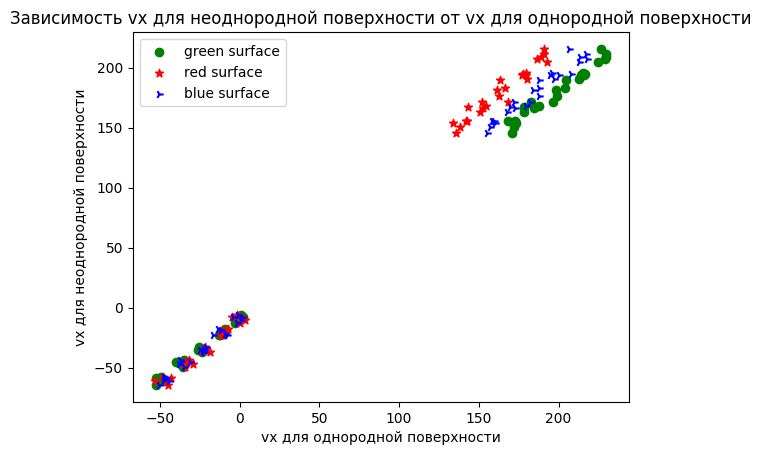

In [28]:
fig, ax = plt.subplots()
x1 = df_green_converted['v_green_x']
x2 = df_red_converted['v_red_x']
x3 = df_blue_converted['v_blue_x']
y = df_converted['v_x']
ax.scatter(x1, y, color = 'green', marker = 'o', label = 'green surface')
ax.set_ylabel('vx для неоднородной поверхности')
ax.set_xlabel('vx для однородной поверхности')
ax.scatter(x2, y, marker = '*', color = 'red', label = 'red surface')
ax.scatter(x3, y, marker = '4', color = 'blue', label = 'blue surface')
# plt.grid(axis='x', color='0.5')
# plt.grid(axis='y', color='0.95')
ax.set_title('Зависимость vx для неоднородной поверхности от vx для однородной поверхности')
ax.legend()
plt.show()

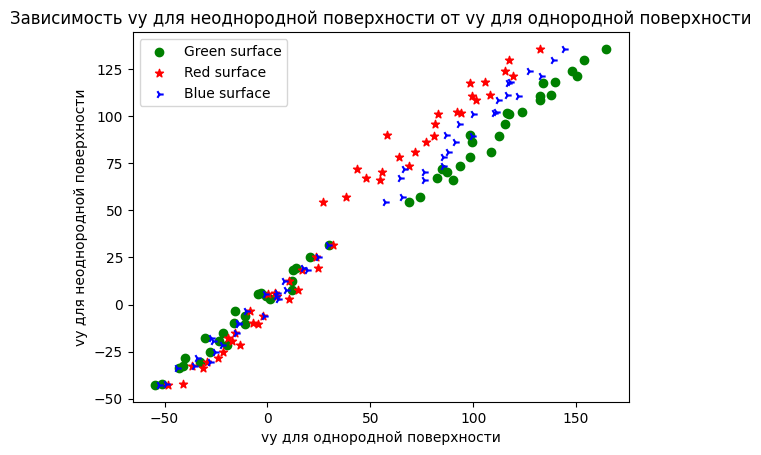

In [29]:
fig, ax = plt.subplots()
x1 = df_green_converted['v_green_y']
x2 = df_red_converted['v_red_y']
x3 = df_blue_converted['v_blue_y']
y = df_converted['v_y']
ax.scatter(x1, y, color = 'green', marker = 'o', label = 'Green surface')
ax.set_ylabel('vy для неоднородной поверхности')
ax.set_xlabel('vy для однородной поверхности')
ax.scatter(x2, y, marker = '*', color = 'red', label = 'Red surface')
ax.scatter(x3, y, marker = '4', color = 'blue', label = 'Blue surface')
ax.set_title('Зависимость vy для неоднородной поверхности от vy для однородной поверхности')
ax.legend()
plt.show()

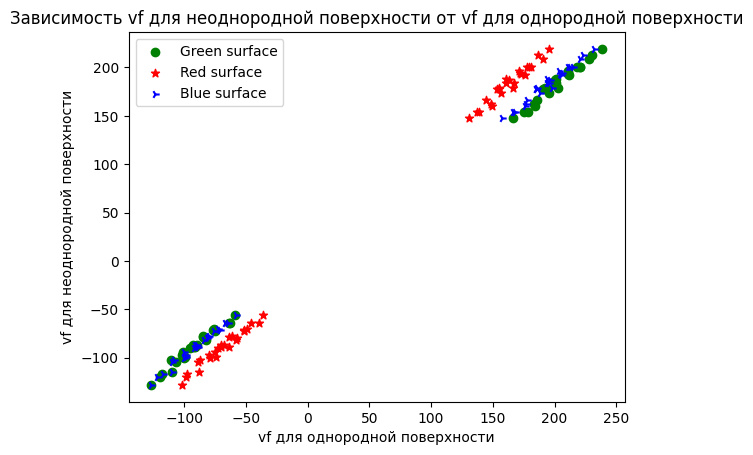

In [30]:
fig, ax = plt.subplots()
x1 = df_green_converted['v_green_f']
x2 = df_red_converted['v_red_f']
x3 = df_blue_converted['v_blue_f']
y = df_converted['v_f']
ax.scatter(x1, y, color = 'green', marker = 'o', label = 'Green surface')
ax.set_ylabel('vf для неоднородной поверхности')
ax.set_xlabel('vf для однородной поверхности')
ax.scatter(x2, y, marker = '*', color = 'red', label = 'Red surface')
ax.scatter(x3, y, marker = '4', color = 'blue', label = 'Blue surface')
ax.set_title('Зависимость vf для неоднородной поверхности от vf для однородной поверхности')
ax.legend()
plt.show()